In [121]:
# load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [123]:
# load the dataset
athletes = pd.read_csv('C:/Users/Abigail/Documents/Data/datatouse.csv')


In [7]:
# view of the first 5 rows of the dataframe
athletes.head()


,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
1,79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
2,80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
3,98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN
4,134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,NaN


In [125]:
# info of the dataframe
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40210 entries, 0 to 40209
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40210 non-null  int64  
 1   ID          40210 non-null  int64  
 2   Name        40210 non-null  object 
 3   Sex         40210 non-null  object 
 4   Age         40208 non-null  float64
 5   Height      39715 non-null  float64
 6   Weight      39468 non-null  float64
 7   Team        40210 non-null  object 
 8   NOC         40210 non-null  object 
 9   Games       40210 non-null  object 
 10  Year        40210 non-null  int64  
 11  Season      40210 non-null  object 
 12  City        40210 non-null  object 
 13  Sport       40210 non-null  object 
 14  Event       40210 non-null  object 
 15  Medal       6012 non-null   object 
dtypes: float64(3), int64(3), object(10)
memory usage: 4.9+ MB


In [26]:
athletes.describe()

,Unnamed: 0,ID,Age,Height,Weight,Year
count,40210.000000,40210.000000,40208.000000,39715.000000,39468.000000,40210.000000
mean,135873.537652,68401.498483,25.968439,176.167418,71.233278,2012.008555
std,79218.060770,39500.246808,5.645493,11.453522,15.829824,3.295328
min,1.000000,2.000000,12.000000,133.000000,28.000000,2008.000000
25%,66483.250000,34012.000000,22.000000,168.000000,60.000000,2008.000000
50%,137267.500000,69009.000000,25.000000,176.000000,69.000000,2012.000000
75%,204047.750000,102439.000000,29.000000,184.000000,80.000000,2016.000000
max,271110.000000,135568.000000,71.000000,226.000000,214.000000,2016.000000


In [126]:
# which columns contain null values in the dataframe
nan_values = athletes.isna()
nan_columns = nan_values.any()
nan_columns

Unnamed: 0    False
ID            False
Name          False
Sex           False
Age            True
Height         True
Weight         True
Team          False
NOC           False
Games         False
Year          False
Season        False
City          False
Sport         False
Event         False
Medal          True
dtype: bool

In [128]:
# new dataframe made, grouping values by Team, Year, City where the Olympics was held and if a medal was won or not. Saved to a variable
newdata_medal = athletes[['Team', 'Year', 'City', 'Medal']].copy()
newdata_medal

,Team,Year,City,Medal
0,China,2012,London,NaN
1,Norway,2008,Beijing,Gold
2,Romania,2016,Rio de Janeiro,NaN
3,France,2012,London,NaN
4,Morocco,2012,London,NaN
...,...,...,...,...
40205,Kazakhstan,2016,Rio de Janeiro,NaN
40206,Poland,2008,Beijing,NaN
40207,Poland,2012,London,NaN
40208,Poland,2012,London,NaN


In [129]:
# the null values are removed from the new variable
final_medaldata = newdata_medal.dropna()
final_medaldata


,Team,Year,City,Medal
1,Norway,2008,Beijing,Gold
13,Italy,2016,Rio de Janeiro,Bronze
14,Spain,2008,Beijing,Bronze
15,Azerbaijan,2016,Rio de Janeiro,Bronze
16,Russia,2008,Beijing,Silver
...,...,...,...,...
40143,Croatia,2008,Beijing,Bronze
40180,Russia,2008,Beijing,Gold
40185,Russia,2012,London,Silver
40192,Russia,2008,Beijing,Bronze


In [132]:
# Total count of medals won by each Team at each OLympics
win = newdata_medal.groupby(['Team','City','Year'])['Medal'].count().reset_index(name='AllTotal_medal_count')
win

,Team,City,Year,AllTotal_medal_count
0,Afghanistan,Beijing,2008,1
1,Afghanistan,London,2012,1
2,Afghanistan,Rio de Janeiro,2016,0
3,Albania,Beijing,2008,0
4,Albania,London,2012,0
...,...,...,...,...
781,Zambia,London,2012,0
782,Zambia,Rio de Janeiro,2016,0
783,Zimbabwe,Beijing,2008,4
784,Zimbabwe,London,2012,0


In [134]:
# Now we are looking at the host countries of 2008, 2012 and 2016 Olympics. We want to find the count of their total medals at each Olympics. 
# Group the values by Team, City and Year.
# Add a new column name to the count column and name it 'Total medal count'
final_medaldata = newdata_medal[(newdata_medal['Team'] == "China") | (newdata_medal['Team'] == "Brazil") | (newdata_medal['Team'] == "Great Britain")]
Finaldata = final_medaldata.dropna()
Finaldata_v1 = Finaldata.groupby(['Team','City','Year'])['Medal' ].count().reset_index(name='Total_medal_count')
Finaldata_v1


,Team,City,Year,Total_medal_count
0,Brazil,Beijing,2008,74
1,Brazil,London,2012,55
2,Brazil,Rio de Janeiro,2016,46
3,China,Beijing,2008,170
4,China,London,2012,117
5,China,Rio de Janeiro,2016,109
6,Great Britain,Beijing,2008,81
7,Great Britain,London,2012,122
8,Great Britain,Rio de Janeiro,2016,145


In [135]:
# Is there an overall correlation between the Team and City the Olympics was held?
Finaldata['Team']=Finaldata['Team'].astype('category').cat.codes
Finaldata['City']=Finaldata['City'].astype('category').cat.codes
Finaldata.corr()

C:\Users\Abigail\AppData\Local\Temp\ipykernel_15012\2051480542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Finaldata['Team']=Finaldata['Team'].astype('category').cat.codes
C:\Users\Abigail\AppData\Local\Temp\ipykernel_15012\2051480542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Finaldata['City']=Finaldata['City'].astype('category').cat.codes


,Team,Year,City
Team,1.000000,0.174768,0.174768
Year,0.174768,1.000000,1.000000
City,0.174768,1.000000,1.000000


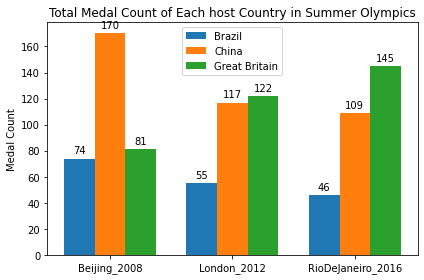

In [1]:
# Create a table to visualise results.
import matplotlib.pyplot as plt
import numpy as np


labels = ['Beijing_2008', 'London_2012', 'RioDeJaneiro_2016']
Beijing_2008 = [74, 55, 46]
London_2012 = [170, 117, 109]
Rio_de_Janeiro_2016 = [81, 122, 145]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, Beijing_2008, width, label='Brazil')
rects2 = ax.bar(x+width, London_2012, width, label='China')
rects3 = ax.bar(x+width*2, Rio_de_Janeiro_2016, width, label='Great Britain')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Medal Count')
ax.set_title('Total Medal Count of Each host Country in Summer Olympics')
ax.set_xticks(x+width, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()